## An analysis of fuel prices in Brazil

### The data analyzed is public and covers the period from Jan/2021 to dec/2022

### Import required to start

In [1]:

# libraries
import warnings
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

### Checking dataset

In [2]:
# Import Data Frame
df_brazil_fuel = pd.read_csv("C:/Users/bruno/Downloads/data_fuel.csv")

# Read first 5 rows
df_brazil_fuel.head(5)

,Region,State,City,Seller,Cep,Product,Date,Price,Measure,Flag
0,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,69906-119,GASOLINA,3/1/2022,"6,99",R$ / litro,VIBRA ENERGIA
1,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,69906-119,ETANOL,3/1/2022,"5,99",R$ / litro,VIBRA ENERGIA
2,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,69906-119,DIESEL,3/1/2022,"6,09",R$ / litro,VIBRA ENERGIA
3,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,69906-119,GASOLINA ADITIVADA,3/1/2022,"7,05",R$ / litro,VIBRA ENERGIA
4,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,69906-119,DIESEL S10,3/1/2022,"6,12",R$ / litro,VIBRA ENERGIA


In [3]:
# Checking Datatypes
df_brazil_fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 10 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   Region   1048574 non-null  object
 1   State    1048574 non-null  object
 2   City     1048574 non-null  object
 3   Seller   1048574 non-null  object
 4   Cep      1048574 non-null  object
 5   Product  1048574 non-null  object
 6   Date     1048574 non-null  object
 7   Price    1048574 non-null  object
 8   Measure  1048574 non-null  object
 9   Flag     1048574 non-null  object
dtypes: object(10)
memory usage: 80.0+ MB


In [4]:
# Convert necessary data types
df_brazil_fuel['Price'] = df_brazil_fuel['Price'].str.replace(',', '.', regex=True)
df_brazil_fuel['Price'] = df_brazil_fuel['Price'].astype(float)
df_brazil_fuel['Date'] = pd.to_datetime(df_brazil_fuel['Date'])
df_brazil_fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 10 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   Region   1048574 non-null  object        
 1   State    1048574 non-null  object        
 2   City     1048574 non-null  object        
 3   Seller   1048574 non-null  object        
 4   Cep      1048574 non-null  object        
 5   Product  1048574 non-null  object        
 6   Date     1048574 non-null  datetime64[ns]
 7   Price    1048574 non-null  float64       
 8   Measure  1048574 non-null  object        
 9   Flag     1048574 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 80.0+ MB


### What is the most expensive fuel?

In [12]:
# Creating a ranking based on average prices by fuel type
df_product_price = df_brazil_fuel[['Product', 'Price']]
df_product_price_avg = df_product_price.groupby('Product')['Price'].mean().reset_index()
df_product_price_avg['Price'] = df_product_price_avg['Price'].round(2)
df_product_price_avg = df_product_price_avg.sort_values(by='Price',ascending=False)


# Convert the DataFrame to a string without displaying the index
result_str = df_product_price_avg.to_string(index=False)

# Print the resulting string
print(result_str)

           Product  Price
GASOLINA ADITIVADA   6.73
          GASOLINA   6.58
        DIESEL S10   5.73
            DIESEL   5.66
            ETANOL   5.11
               GNV   4.55


### In which city and in which year was the highest price per type of fuel recorded?

In [13]:
# Group the DataFrame by 'Product' and find the row with the highest 'Price' within each group
df_brazil_fuel['Year'] = df_brazil_fuel['Date'].dt.year
df_product_price = df_brazil_fuel[['Region', 'State', 'Year', 'City', 'Product', 'Price']]
max_price_indices = df_product_price.groupby('Product')['Price'].idxmax()

# Use the indices to create a new DataFrame with the desired information
highest_price_records = df_product_price.loc[max_price_indices].sort_values(by='Price',ascending=False)

# Print the resulting string
result_str = highest_price_records.to_string(index=False)
print(result_str)

Region State  Year           City            Product  Price
    SE    RJ  2022           MAGE GASOLINA ADITIVADA   9.27
    CO    MT  2022  ALTA FLORESTA         DIESEL S10   9.15
    NE    AL  2022         MACEIO             DIESEL   8.99
    SE    RJ  2022 RIO DE JANEIRO           GASOLINA   8.99
    SE    RJ  2022        ITAGUAI             ETANOL   7.98
    SE    RJ  2022         MARICA                GNV   7.42


### Checking the most used fuel in the country (Gasoline) and showing top 5 highest price

In [11]:
# Filter the DataFrame for rows where 'Product' is 'Gasoline'
gasoline_df = df_product_price[df_product_price['Product'] == 'GASOLINA']

# Group the filtered DataFrame by 'City' and 'Year' and calculate the average price within each group
average_prices_gasoline = gasoline_df.groupby(['City', 'Year'])['Price'].mean().reset_index()

# Sort the DataFrame by average price in descending order
sorted_gasoline_df = average_prices_gasoline.sort_values(by='Price', ascending=False)
sorted_gasoline_df['Price'] = sorted_gasoline_df['Price'].round(2)

# Display the top 5 cities with the highest average gasoline price
top_5_cities_gasoline = sorted_gasoline_df.head(5)


# Print the resulting string
result_str = top_5_cities_gasoline.to_string(index=False)
print(result_str)

                       City  Year  Price
               PORTO SEGURO  2022   8.22
                  TRES RIOS  2022   8.11
             ANGRA DOS REIS  2022   8.07
        TEIXEIRA DE FREITAS  2022   8.05
LIVRAMENTO DE NOSSA SENHORA  2022   8.05


# Comparison of the average price of the most used fuel in the country

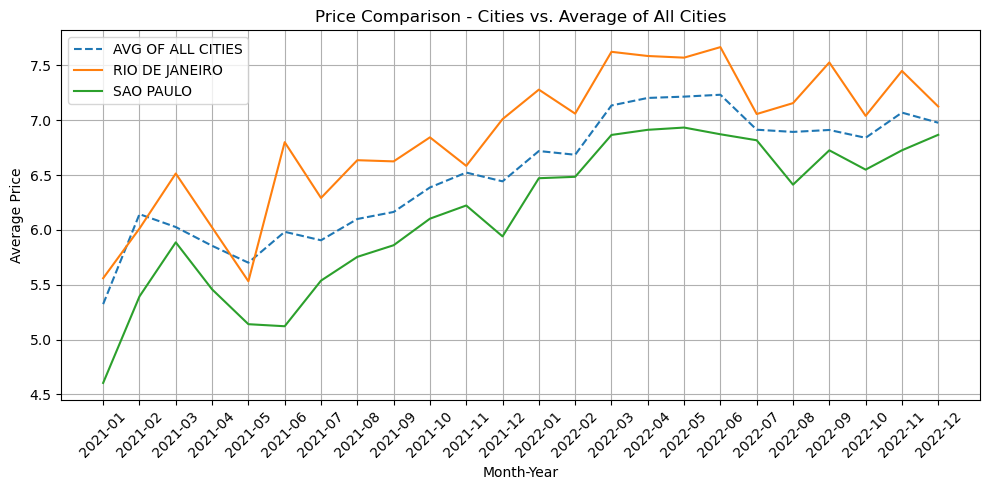

In [15]:

# Filter Gasoline
df = df_brazil_fuel.query('Product == "GASOLINA"')
def plot_price_comparison(df, cities_to_compare):
    # Convert the 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%Y')
    
    # Create a new column 'MonthYear' to represent month and year
    df['MonthYear'] = df['Date'].dt.strftime('%Y-%m')
    
    # Handle possible differences in spacing or case in the city names
    df['City'] = df['City'].str.strip().str.upper()
    
    # Create a line chart comparing the selected cities with the average prices of all cities
    plt.figure(figsize=(10, 5))
    
    # Calculate the average price of all cities per month-year
    avg_price_all_cities = df.groupby(['MonthYear'])['Price'].mean()
    
    plt.plot(avg_price_all_cities.index, avg_price_all_cities.values, label='AVG OF ALL CITIES', linestyle='--')
    
    for city in cities_to_compare:
        # Filter the DataFrame for the current city and calculate its average price per month-year
        city_df = df[df['City'] == city]
        avg_price_city = city_df.groupby('MonthYear')['Price'].mean()
        plt.plot(avg_price_city.index, avg_price_city.values, label=f'{city}')
    
    plt.title('Price Comparison - Cities vs. Average of All Cities')
    plt.xlabel('Month-Year')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



cities_to_compare = ['RIO DE JANEIRO', 'SAO PAULO']
plot_price_comparison(df, cities_to_compare)

## Conclusion

##### Throughout the analysis and especially looking at the last graph, it is possible to see that the city of Rio de Janeiro, which is the second most populous city in the country (just behind São Paulo), has one of the highest prices in the country, being quite discrepant when compared to the national average and the São Paulo average.

##### A curious fact is that RIo de Janeiro is home to some of the main oil refining complexes, and it is from there that around 80% of all oil produced in the country comes from.